# EDA
The goal of EDA is to understand the dataset and find interesting business and user patterns, as this will also help in designing the recommendation engine. 

### 1. import the clean dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# import all five csv files as Pandas dataframe

business = pd.read_csv('business_clean.csv')  # contains business data including location data, attributes and categories
user = pd.read_csv('user_clean.csv') # contains users data including the user's friend mapping and all the metadata associated with the user
review = pd.read_csv('review_clean.csv') # contains full review text data including the user_id that wrote the review and the business_id the review is written for
tip = pd.read_csv('tip_clean.csv') # tips written by a user on a business, tips are shorter than reviews and tend to convey quick suggestions
checkin = pd.read_csv('checkin_clean.csv') # checkins on a business

### 2. Understand business pattern

#### 2.1 Common restaurants

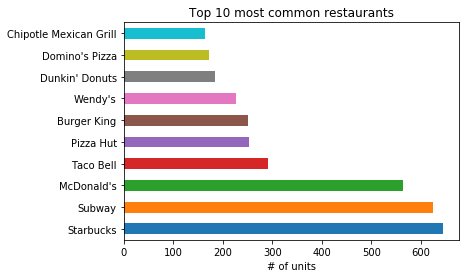

In [3]:
# ten most common restaurant names
business.name.value_counts()[:10].plot(kind='barh');
plt.xlabel('# of units');
plt.title('Top 10 most common restaurants');

As expected, top 10 most common restaurants are the popular chain or franchised restaurants, fast food or coffee shops.

#### 2.2 Restaurants by state

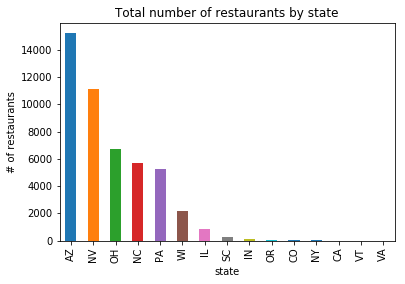

In [4]:
# number of restaurants by state
business.groupby('state')['name'].count().sort_values(ascending=False).plot(kind='bar');
plt.ylabel('# of restaurants');
plt.title('Total number of restaurants by state');

As revealed, this dataset only contains a subset of all yelp businesses, focused on businesses from only a few selected states. In terms of restaurants, only a portion of restaurants from 10 states (Arizona, Nevada, Ohio, North Carolina, Pennsylvania, Wisconsin, Illinois, South Carolina, Indiana and Oregon) are available from this dataset and used for EDA and visualization.

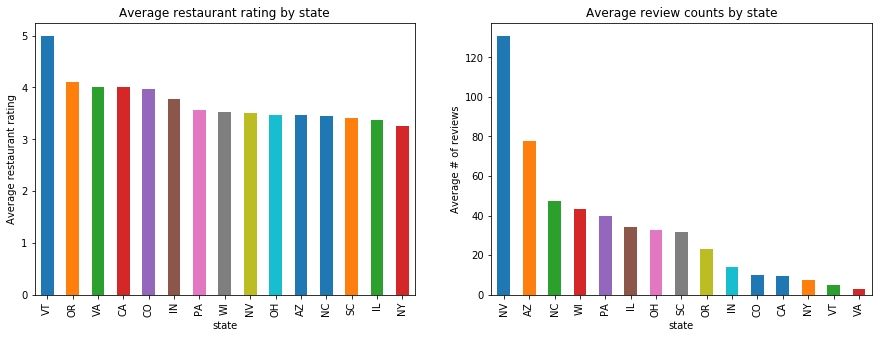

In [5]:
plt.figure(figsize=(15,5))

# average rating by state
plt.subplot(1,2,1)
business.groupby('state')['stars'].mean().sort_values(ascending=False).plot(kind='bar');
plt.ylabel('Average restaurant rating');
plt.title('Average restaurant rating by state');

# average review_count by state
plt.subplot(1,2,2)
business.groupby('state')['review_count'].mean().sort_values(ascending=False).plot(kind='bar');
plt.ylabel('Average # of reviews');
plt.title('Average review counts by state');

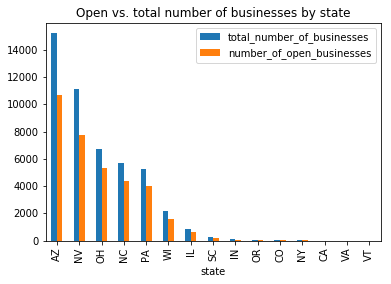

In [6]:
# open businesses vs total businesses by state
open_by_state = business.groupby('state')['is_open'].agg(['count','sum']).sort_values(by=['count'],ascending=False)
open_by_state.columns = ['total_number_of_businesses','number_of_open_businesses']
open_by_state.plot(kind='bar');
plt.title('Open vs. total number of businesses by state');

#### 2.3 Restaurant rating vs. review

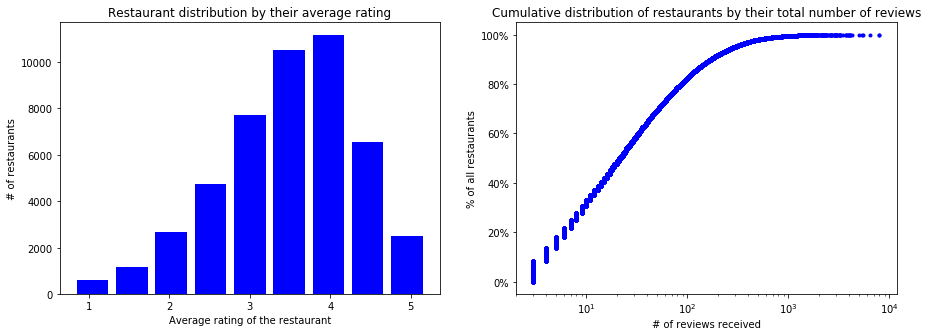

In [7]:
# restaurant distribution by their rating
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
business.stars.plot(kind='hist', bins=9, range=(0.8, 5.2), rwidth=0.8, color = 'blue');
plt.xlabel('Average rating of the restaurant');
plt.ylabel('# of restaurants');
plt.title('Restaurant distribution by their average rating');

# restaurant distribution by their review counts

def ecdf(array):
    """Compute ECDF for 1D array of measurement data."""
    x = np.sort(array)  #sort array to use as the x axis    
    y = np.arange(1, len(array)+1)/len(array) #use np.arange to create the y axis for cdf from 1/len to 1
    return x,y

ax = plt.subplot(1,2,2)
x,y = ecdf(business.review_count)
ax.plot(x, y, marker = '.', linestyle='none',color='blue');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.xscale('log');
plt.xlabel('# of reviews received');
plt.ylabel('% of all restaurants');
plt.title('Cumulative distribution of restaurants by their total number of reviews');

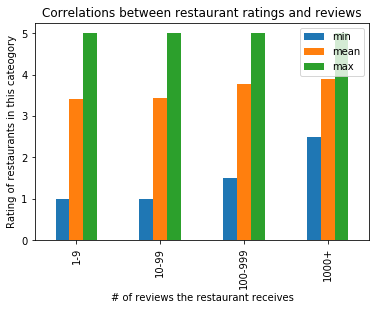

In [8]:
# correlation between rating and review
count_cat = np.log10(business.review_count)//1
busi_by_rev_count = business.groupby(count_cat)['stars'].agg(['min','mean','max'])
busi_by_rev_count.index = ['1-9','10-99','100-999','1000+']
busi_by_rev_count.plot(kind='bar');
plt.xlabel('# of reviews the restaurant receives');
plt.ylabel('Rating of restaurants in this cateogory');
plt.title('Correlations between restaurant ratings and reviews');

As shown, the majority of the restaurants have a rating between 3.0 and 4.5, with 3.5 and 4.0 being the most common ratings. Half of the restaunrants have less than 30 reviews, although the record number of reviews is as high as 7968.
The correlation between ratings and reviews reveals that restaurants with more reviews tend to have higher ratings on average.

#### 2.4 Restaurants by price range

In [9]:
# variation of rating and review_count with price_range
rest_by_price = business.groupby(business['attributes.RestaurantsPriceRange2'])['business_id','stars','review_count'].agg({'business_id': 'count','stars':'mean','review_count':['mean','max']})
rest_by_price.index = ["$ (low)","$$ (mid)","$$$ (high)","\$$$$ (highest)"]
rest_by_price.index.name = 'RestaurantPriceRange'
rest_by_price

business_id     stars review_count      
                           count      mean         mean   max
RestaurantPriceRange                                         
$ (low)                    19450  3.450026    49.021285  4981
$$ (mid)                   19766  3.516822   104.392239  7968
$$$ (high)                  1615  3.557585   172.191331  7866
\$$$$ (highest)              320  3.526562   186.746875  3244

As shown, most restaurants are in the low (40.9%) and mid (41.6%) price range, whereas restaurants in the high and highest price ranges only account for 3.4% and 0.67%, respectively. In addition, there are 13.5% of restaurants having missing price range data. 

In terms of ratings ('stars'), restaurants in different price ranges have relatively close average ratings of around 3.5. 
In terms of the # of reviews received ('review_count'), more expensive restaurants tend to receive more reviews on average.

In [10]:
# top reviewed restaurants

print("Top 3 restaurants of all:")
print(business[['stars','review_count','name','state','city','attributes.RestaurantsPriceRange2']].sort_values(['stars','review_count'],ascending=False)[0:3])

print("-------------------------")
print("Top 3 restaurants in the most expensive price range ($$$$):")
print(business[business['attributes.RestaurantsPriceRange2'] == 4][['stars','review_count','name','state','city']].sort_values(['stars','review_count'],ascending=False)[0:3])

print("-------------------------")
print("Top 3 restaurants in the high price range ($$$):")
print(business[business['attributes.RestaurantsPriceRange2'] == 3][['stars','review_count','name','state','city']].sort_values(['stars','review_count'],ascending=False)[0:3])

print("-------------------------")
print("Top 3 restaurants in the mid price range ($$):")
print(business[business['attributes.RestaurantsPriceRange2'] == 2][['stars','review_count','name','state','city']].sort_values(['stars','review_count'],ascending=False)[0:3])

print("-------------------------")
print("Top 3 restaurants in the low price range ($):")
print(business[business['attributes.RestaurantsPriceRange2'] == 1][['stars','review_count','name','state','city']].sort_values(['stars','review_count'],ascending=False)[0:3])

Top 3 restaurants of all:
       stars  review_count             name state       city  \
7464     5.0          1746  Little Miss BBQ    AZ    Phoenix   
31910    5.0          1380     Brew Tea Bar    NV  Las Vegas   
45402    5.0           547       Gelatology    NV  Las Vegas   

       attributes.RestaurantsPriceRange2  
7464                                 2.0  
31910                                1.0  
45402                                1.0  
-------------------------
Top 3 restaurants in the most expensive price range ($$$$):
       stars  review_count                        name state       city
36062    5.0           133                Kame Omakase    NV  Las Vegas
15661    5.0            51        Binkley's Restaurant    AZ    Phoenix
12668    5.0            17  Rise Craft Coffee + Eatery    AZ    Phoenix
-------------------------
Top 3 restaurants in the high price range ($$$):
       stars  review_count                     name state       city
45503    5.0            36 

#### 2.5 Restaurants by cuisine and style

In [11]:
# define a default list for restaurant cuisines and restaurant styles

cuisines = ['mexican','italian','chinese','japanese','thai','indian','american (new)','american (traditional)','french',
           'middle eastern','korean','mediterranean','vietnamese','cajun','greek','hawaiian','asian fusion','vegetarian',
            'vegan','steakhouse','barbeque','sushi bars','tex-mex','specialty food','gluten-free','coffee & tea','desserts',
            'seafood','ice cream & frozen yogurt','bakeries','beer','wine & spirits','soup','pizza','hot dogs','burgers','donuts',
           'cupcakes','salad','tacos','chicken wings','sandwiches','bubble tea','tapas/small plates','shaved ice','bagels',
            'southern','local flavor','latin american','custom cakes','ethinic food']

styles = ['restaurants','fast food','food stands','street vendors','nightlife','buffets','bars','food trucks','breakfast & brunch','diners','cocktail bars',
          'pubs','sports bars','wine bars','beer bars','casinos','juice bars & smoothies','caterers','delis','cafes','lounges',
          'music venues','performing arts','food delivery services','dive bars','dance clubs','breweries']

In [13]:
# extract cuisine and style information from the 'categories' columns

business['cuisine'] = None
business['style'] = None

for idx, row in business.iterrows():
    if row['categories'] is not np.nan:
        entries = row['categories'].split(',')
        for entry in entries:
            entry = entry.strip().lower()
            if entry in cuisines: 
                if business.loc[idx,'cuisine'] == None: 
                    business.loc[idx,'cuisine'] = entry
                else:
                    business.loc[idx,'cuisine'] += (', ' + entry)
            elif entry in styles:
                if business.loc[idx,'style'] == None:
                    business.loc[idx,'style'] = entry
                else:
                    business.loc[idx,'style'] += (', ' + entry)

business.fillna(value=pd.np.nan, inplace=True) # update None with NaN

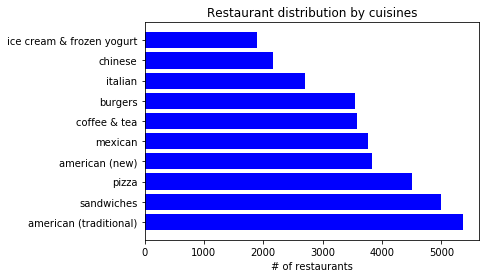

In [14]:
# restaurant distribution by cuisines (type of foods served)

from collections import Counter
cnt_cuisine = Counter()

for idx, row in business.iterrows():
    if row['cuisine'] is not np.nan: 
        entries = row['cuisine'].split(',')
        for entry in entries:
            entry = entry.strip().lower()
            cnt_cuisine[entry] += 1
            
top_cuisine = cnt_cuisine.most_common(10)

plt.barh(y=[x[0] for x in top_cuisine], width=[x[1] for x in top_cuisine],color='blue');
plt.xlabel('# of restaurants');
plt.title('Restaurant distribution by cuisines');

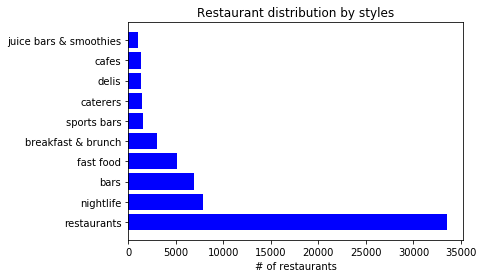

In [15]:
# restaurant distribution by styles

from collections import Counter
cnt_style = Counter()

for idx, row in business.iterrows():
    if row['style'] is not np.nan: 
        entries = row['style'].split(',')
        for entry in entries:
            entry = entry.strip().lower()
            cnt_style[entry] += 1
            
top_style = cnt_style.most_common(10)

plt.barh(y=[x[0] for x in top_style], width=[x[1] for x in top_style],color='blue');
plt.xlabel('# of restaurants');
plt.title('Restaurant distribution by styles');

### 3. Understand user pattern

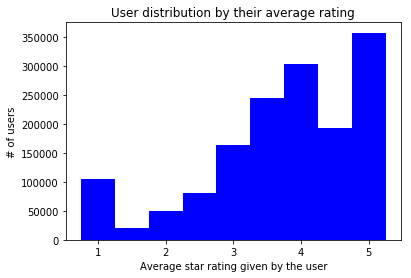

In [16]:
# user distribution by average star rating
user.average_stars.plot(kind='hist',bins=9, range=(0.75,5.25),color='blue');
plt.xlabel('Average star rating given by the user');
plt.ylabel('# of users');
plt.title('User distribution by their average rating');

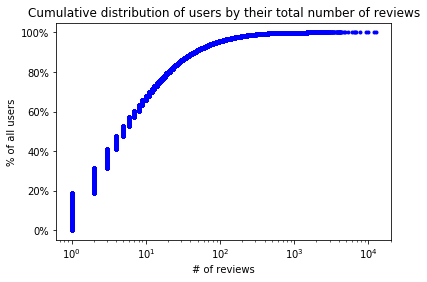

In [17]:
# user distribution by total number of reviews
x, y = ecdf(user.review_count)
ax = plt.subplot()
ax.plot(x, y, marker = '.', linestyle='none',color='blue');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.xscale('log');
plt.xlabel('# of reviews');
plt.ylabel('% of all users');
plt.title('Cumulative distribution of users by their total number of reviews');

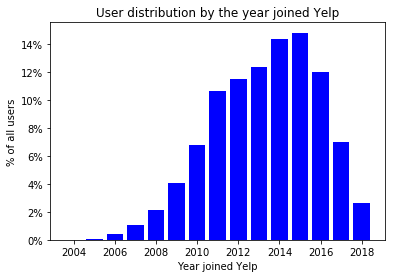

In [18]:
# user distribution by the year they joined Yelp
import re
yr_joined = user.yelping_since.apply(lambda x: re.findall('^\d{4}',x)[0]).astype(int) # extract the year from the date string
ax = yr_joined.plot(kind='hist',density=True,bins=15,range=(2003.5,2018.5),rwidth=0.8, color='blue');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.xlabel('Year joined Yelp');
plt.ylabel('% of all users');
plt.title('User distribution by the year joined Yelp');

### 4. Understand reviews and tips

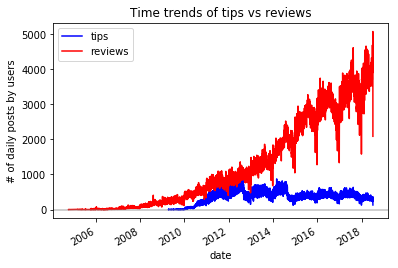

In [19]:
# plot time trend for the number of daily tips
tip['date'] = pd.to_datetime(tip.date, format='%Y-%m-%d')
tip.groupby('date')['text'].count().plot(color='blue');

# plot time trend for the number of daily reviews
review['date'] = pd.to_datetime(review.date, format='%Y-%m-%d')
review.groupby('date')['text'].count().plot(color='red');

plt.axhline(y=0, color='grey',alpha=0.5);
plt.ylabel('# of daily posts by users');
plt.legend(['tips','reviews']);
plt.title('Time trends of tips vs reviews');

As shown, review is one of the earliest feature Yelp has since its beginning, whereas tip is one of the later features introduced in 2009. The popularity of reviews (# of reviews) shows a steady upward trend over time with seasonal fluctuations, whereas the popularity of tips (# of tips) increases in the first four years and slowly dives down afterward. Overall, tip is not as popular as review.

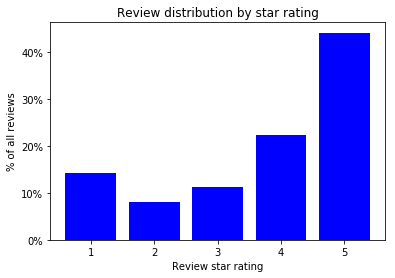

In [20]:
# review distribution by star rating
ax = review.stars.plot(kind='hist',density=True, bins=5, range=(0.5,5.5),rwidth=0.8, color='blue');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.xlabel('Review star rating');
plt.ylabel('% of all reviews');
plt.title('Review distribution by star rating');

### 5. Understand checkins

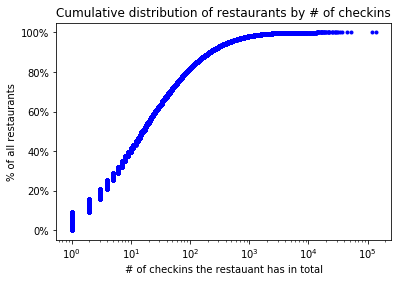

In [21]:
# business distribution by their total number of checkins
x, y = ecdf(checkin.total_count)
ax = plt.subplot()
ax.plot(x, y, marker = '.', linestyle='none', color='blue');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.xscale('log');
plt.xlabel('# of checkins the restauant has in total');
plt.ylabel('% of all restaurants');
plt.title('Cumulative distribution of restaurants by # of checkins');

### 6. Interactive visualization

(to do)

In [22]:
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper, Select
from bokeh.layouts import row, column, widgetbox
output_notebook()

Loading BokehJS ...

In [ ]:
# basic bokeh plot
plot1 = figure()
plot1.circle([1,2,3,4],[1,2,3,4])
show(plot1)

In [ ]:
# ColumnDataSource object
df = {'x': [1,2,3,4], 'y':[1,2,3,4]}
source = ColumnDataSource(df)
plot2 = figure()
plot2.circle('x', 'y', source=source, size=8)
show(plot2)

In [ ]:
# temp

from collections import Counter
cnt = Counter()

for idx, row in business.iterrows():
    if row['categories'] is not np.nan: 
        entries = row['categories'].split(',')
        for entry in entries:
            entry = entry.strip().lower()
            cnt[entry] += 1
            
top_category = cnt.most_common(10)
top_category